In [1]:
%matplotlib inline

from statsbombpy import sb

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import font_manager as fm, rcParams
import os
from mplsoccer.pitch import Pitch

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen
from mplsoccer.utils import FontManager
import seaborn as sns
from matplotlib.colors import to_rgba, LinearSegmentedColormap
import matplotlib.gridspec as gridspec
import matplotlib.patheffects as path_effects

from PIL import Image

from urllib.request import urlopen, urlretrieve
from highlight_text import HighlightText, ax_text, fig_text
import requests
from io import BytesIO
import cmasher as cmr

In [17]:
sb.matches(competition_id=53, season_id=106)

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3847567,2022-07-31,18:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Germany Women's,2,1,available,...,2022-09-12T15:04:12.439476,6,Final,Wembley Stadium,Kateryna Monzul,Sarina Glotzbach-Wiegman,Martina Voss-Tecklenburg,1.1.0,2,2
1,3845506,2022-07-26,21:00:00.000,Europe - UEFA Women's Euro,2022,England Women's,Sweden Women's,4,0,available,...,2022-09-06T06:29:30.151649,5,Semi-finals,Bramall Lane,Esther Staubli,Sarina Glotzbach-Wiegman,Peter Gerhardsson,1.1.0,2,2
2,3835335,2022-07-15,21:00:00.000,Europe - UEFA Women's Euro,2022,Northern Ireland,England Women's,0,5,available,...,2022-08-25T15:50:02.843890,3,Group Stage,St. Mary''s Stadium,Esther Staubli,Kenny Shiels,Sarina Glotzbach-Wiegman,1.1.0,2,2
3,3835323,2022-07-09,18:00:00.000,Europe - UEFA Women's Euro,2022,Portugal Women's,Switzerland Women's,2,2,available,...,2022-08-29T19:19:33.588699,1,Group Stage,Leigh Sports Village Stadium,Jana Adamkova,Francisco Miguel Conceição Roque Neto,Nils Herbert Kromann Nielsen,1.1.0,2,2
4,3835325,2022-07-10,21:00:00.000,Europe - UEFA Women's Euro,2022,France Women's,Italy Women's,5,1,available,...,2022-09-04T19:01:10.410332,1,Group Stage,AESSEAL New York Stadium,Rebecca Welch,Corinne Catherine Diacre,Milena Bertolini,1.1.0,2,2
5,3835324,2022-07-09,21:00:00.000,Europe - UEFA Women's Euro,2022,Netherlands Women's,Sweden Women's,1,1,available,...,2022-08-29T19:17:00.202011,1,Group Stage,Bramall Lane,Cheryl Foster,Mark Richard David Parsons,Peter Gerhardsson,1.1.0,2,2
6,3835331,2022-07-13,18:00:00.000,Europe - UEFA Women's Euro,2022,Sweden Women's,Switzerland Women's,2,1,available,...,2022-08-25T19:03:09.037945,2,Group Stage,Bramall Lane,Marta Huerta de Aza,Peter Gerhardsson,Nils Herbert Kromann Nielsen,1.1.0,2,2
7,3835320,2022-07-07,21:00:00.000,Europe - UEFA Women's Euro,2022,Norway Women's,Northern Ireland,4,1,available,...,2022-08-25T10:44:36.086663,1,Group Stage,St. Mary''s Stadium,Lina Lehtovaara,Martin Sjögren,Kenny Shiels,1.1.0,2,2
8,3845507,2022-07-27,21:00:00.000,Europe - UEFA Women's Euro,2022,Germany Women's,France Women's,2,1,available,...,2022-08-25T21:30:18.952432,5,Semi-finals,Stadium MK,Cheryl Foster,Martina Voss-Tecklenburg,Corinne Catherine Diacre,1.1.0,2,2
9,3844387,2022-07-23,21:00:00.000,Europe - UEFA Women's Euro,2022,France Women's,Netherlands Women's,1,0,available,...,2022-08-29T20:59:06.480438,4,Quarter-finals,AESSEAL New York Stadium,Ivana Martinčić,Corinne Catherine Diacre,Mark Richard David Parsons,1.1.0,2,2


In [2]:
parser = Sbopen()
match_files = [3835329]
df = pd.concat([parser.event(file)[0] for file in match_files])

In [3]:
sb.lineups(match_id=3835329)

{"Denmark Women's":     player_id                      player_name player_nickname  jersey_number  \
 0        4650                      Nadia Nadim            None              9   
 1       10088                     Katrine Veje            None             11   
 2       10102                     Stine Larsen            None             12   
 3       10108        Pernille Mosegaard Harder            None             10   
 4       10109        Sanne Troelsgaard-Nielsen            None              7   
 5       10111             Simone Boye-Sørensen            None              5   
 6       10275             Sofie Junge Pedersen            None             13   
 7       15789            Rikke Læntver Sevecke   Rikke Sevecke              4   
 8       24460             Signe Kallesøe Bruun     Signe Bruun             20   
 9       32223     Sara Gedsted Thrige Andersen            None              2   
 10      32229                   Sara Holmgaard            None              8 

In [42]:
pitchColor = "#7FB069"
figColor = "#7FB069"
linesColor = "black"
hteamColor = "#E32219"
secondColor = "#FFFFFF"
ateamColor = "#003581"
MVP_id = 87195
MVPname = "Janni Thomsen"
tournament = "Women's EURO 2022"
textColor = "black"
hteam = "Denmark Women's"
ateam = "WNT Finland"

pitchCmap = LinearSegmentedColormap.from_list("pitch heatmap", ["#7FB069",hteamColor], N=100)

In [5]:
Statsbomb = Image.open(r"C:\Users\Gusse\OneDrive\Dokumenter\Python\Womens Euro 2022\sb_text_logo.png")

In [6]:
URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/roboto/Roboto%5Bwdth,wght%5D.ttf'
URL2 = 'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf'
robotto_regular = FontManager(URL)
robboto_bold = FontManager(URL2)

In [46]:
passes = df[df.type_name == "Pass"]
passes = passes[passes.team_name == hteam]
passes = passes[(passes["type_name"]!="Kick Off") & (passes["type_name"]!="Goal Kick") 
                    & (passes["type_name"]!="Free Kick") & (passes["type_name"]!="Throw-in") 
                    & (passes["type_name"]!="Corner") & (passes["outcome_name"]!="Incomplete") 
                    & (passes["outcome_name"]!="Pass Offside") & (passes["outcome_name"]!="Out") 
                    & (passes["outcome_name"]!="Unknown")]

passes = passes[['team_name', 'player_name', "player_id", 'minute', 'second', 'x',"y", "type_name", "outcome_name",
                     "end_x","end_y", "type_name", "pass_shot_assist"]]
passes = passes.reset_index()

In [8]:
passes['beginning'] = np.sqrt(np.square(120-passes['x']) + np.square(40 -passes['y']))
passes['end'] = np.sqrt(np.square(120 - passes['end_x']) + np.square(40 - passes['end_y']))

passes['progressive'] = [(passes['end'][x]) / (passes['beginning'][x]) < .75 for x in range(len(passes.beginning))]

In [9]:
progPasses = passes[passes["progressive"]==True]

In [50]:
keyPasses = passes[passes["pass_shot_assist"]==True]

In [10]:
allEvents = df[df["team_name"]== hteam]
allEvents = allEvents[(allEvents["type_name"]!= 'Ball Receipt') & (allEvents["type_name"]!= 'Injury Stoppage') 
                            & (allEvents["type_name"]!= 'Player Off') & (allEvents["type_name"]!= 'Player On') 
                            & (allEvents["type_name"]!= 'Substitution') & (allEvents["type_name"]!= 'Miscontrol')
                      & (allEvents["type_name"]!= 'Shot') & (allEvents["type_name"]!= 'Dispossessed')]
allEvents = allEvents[(allEvents["outcome_name"]!="Incomplete") & (allEvents["outcome_name"]!="Blocked") 
                      & (allEvents["outcome_name"]!="Out") 
                    & (allEvents["outcome_name"]!="Lost Out") & (allEvents["outcome_name"]!="Lost In Play") 
                & (allEvents["outcome_name"]!="Unknown") & (allEvents["outcome_name"]!="Pass Offside")
                      & (allEvents["type_name"]!="Starting XI") & (allEvents["type_name"]!="Half Start")
                     & (allEvents["type_name"]!="Half End") & (allEvents["type_name"]!="Ball Receipt")]

allEvents = allEvents[[ 'player_name',"player_id", 'minute', 'second', 'x',"y", "type_name", 
                             "outcome_name"]]

In [11]:
passes["passer"] = passes["player_name"]
passes["recipient"] = passes["player_name"].shift(-1)

In [12]:
average_locations = passes.groupby("passer").agg({"x":["mean"], "y": ["mean", "count"]})
average_locations.columns = ["x","y", "count", ]
average_locations.sort_values(by="passer", ascending=True)

mvp_location = average_locations[average_locations.index == MVPname]

In [13]:
allBallRecovery = allEvents[allEvents.type_name == 'Ball Recovery']

allInterception = allEvents[allEvents.type_name == 'Interception']


allDribble = allEvents[allEvents.type_name == 'Dribble']
allDribble = allDribble[allDribble.outcome_name == 'Complete']

allTackle = allEvents[allEvents.type_name == "Tackle"]

allClearance = allEvents[allEvents.type_name == "Clearance"]

allBlock = allEvents[allEvents.type_name == "Block"]

allDuel = allEvents[allEvents.type_name == "Duel"]
allDuel = allDuel[allDuel['outcome_name'].notna()]

In [51]:
def matchReport(player, save=False):
    tempAvgLoc = average_locations[average_locations.index == player]
    tempEvents = allEvents[allEvents["player_name"]==player]
    tempPasses = passes[passes["player_name"]== player]
    tempProg = progPasses[progPasses["player_name"]== player]
    tempKey = keyPasses[keyPasses["player_name"]== player]
    tempBC = allBallRecovery[allBallRecovery["player_name"]== player]
    tempClear = allClearance[allClearance["player_name"]== player]
    tempInter = allInterception[allInterception["player_name"]== player]
    tempBlock = allBlock[allBlock["player_name"]== player]
    tempDuel = allDuel[allDuel["player_name"]== player]
    
    counttempPasses = tempPasses.shape[0]
    counttempProg = tempProg.shape[0]
    counttempKey = tempKey.shape[0]
    counttempBC = tempBC.shape[0]
    counttempClear = tempClear.shape[0]
    counttempInter = tempInter.shape[0]
    counttempBlock = tempBlock.shape[0]
    counttempDuel = tempDuel.shape[0]
    
    pitch = VerticalPitch(pitch_type='statsbomb',  line_zorder=2, line_color=linesColor, pitch_color=pitchColor)
    fig, axs = pitch.grid(ncols=3, axis=False, endnote_height=0.05)
    fig.set_facecolor("lightgrey")
    
    axs["title"].text (0.15, 0.01, f"Average Location", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

    axs["title"].text (0.50, 0.01, f"Pass Map", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)

    axs["title"].text (0.85, 0.01, f"Defensive Actions", color= textColor, va="center", ha="center",
                   fontsize=18, fontproperties=robotto_regular.prop)


    HighlightText(x=.20, y=19,
                  s=f'<{hteam}> vs <{ateam}>', fontsize=30,
                  highlight_textprops=[{"color": hteamColor},
                                   {"color": ateamColor}])

    TITLE_STR1 = f'{player}s Match Report'
    title1_text = axs['title'].text(0.5, 0.7, TITLE_STR1, fontsize=28, color='#000009',
                               fontproperties=robotto_regular.prop,
                                ha='center', va='center')


    average_location = pitch.scatter(tempAvgLoc.x, tempAvgLoc.y,
                           s=300,
                           marker= "o", color=hteamColor, edgecolors=secondColor, linewidth=2, alpha=1,
                       ax=axs['pitch'][0], zorder=4)

    kde = pitch.kdeplot(tempEvents.x, tempEvents.y, ax=axs['pitch'][0],
                    shade=True, levels=100,
                    shade_lowest=False,
                    cut=4.1, thresh=.3,
                    cmap = pitchCmap)


    pitch.arrows(tempPasses.x, tempPasses.y,
             tempPasses.end_x, tempPasses.end_y, width=2,
             headwidth=10, headlength=10, color=hteamColor, ax=axs['pitch'][1], alpha = 1, 
             zorder= 2, label=f"Completed passes: {counttempPasses}")

    pitch.arrows(tempProg.x, tempProg.y,
             tempProg.end_x, tempProg.end_y, width=2,
             headwidth=10, headlength=10, color="purple", ax=axs['pitch'][1], alpha = 1, 
             zorder=2, label=f"Progressive Passes: {counttempProg}")


    pitch.arrows(tempKey.x, tempKey.y,
             tempKey.end_x, tempKey.end_y, width=2,
             headwidth=10, headlength=10, color="brown", ax=axs['pitch'][1], alpha = 1, 
             zorder=2, label=f"Key Passes: {counttempKey}")


    scatter_recovery = pitch.scatter(tempBC.x, tempBC.y, c= hteamColor, edgecolor = secondColor,
                                 s=120, marker='s',  ax=axs['pitch'][2], zorder=2, 
                                 label=f"Ball Recoveries: {counttempBC}")

    scatter_interception = pitch.scatter(tempInter.x, tempInter.y, c= hteamColor,
                                     s=200, marker='d', edgecolor = secondColor, ax=axs['pitch'][2], zorder=2, 
                                     label=f"Interceptions: {counttempInter}")

    scatter_duel = pitch.scatter(tempDuel.x, tempDuel.y, c=hteamColor, edgecolor= secondColor,
                               s=520, marker=".",  ax=axs['pitch'][2], zorder=2, 
                             label= f"Duels Won: {counttempDuel}")

    scatter_Clearance = pitch.scatter(tempClear.x, tempClear.y, c=hteamColor, edgecolor= secondColor,
                               s=200, marker="^",  ax=axs['pitch'][2], zorder=2, 
                             label= f"Clearances: {counttempClear}")

    scatter_Block = pitch.scatter(tempBlock.x, tempBlock.y, c=hteamColor, edgecolor= secondColor,
                               s=200, marker="h",  ax=axs['pitch'][2], zorder=2, 
                             label= f"Blocks: {counttempBlock}")




    legend = axs['pitch'][1].legend(loc='upper center', facecolor="none", edgecolor="none", labelspacing=1,  bbox_to_anchor=(0.5, -0.01), fancybox=True)
    for text in legend.get_texts():
        text.set_fontsize(15)
        text.set_va('center')
    
    legend = axs['pitch'][2].legend(loc='upper center', facecolor="none", edgecolor="none", labelspacing=1,  bbox_to_anchor=(0.5, -0.01))
    for text in legend.get_texts():
        text.set_fontsize(15)
        text.set_va('center')

    sb_logo = fig.add_axes([0.38, 1.04, 0.25, 0.04])
    sb_logo.axis('off')
    sb_logo.imshow(Statsbomb)

    
    if save ==True:
        plt.savefig(f'viz/{player} Match Report vs {ateam}, {tournament}', dpi=300, bbox_inches='tight')
    else:
        plt.show()

In [15]:
passes["player_name"].unique()

array(['Signe Kallesøe Bruun', 'Katrine Veje',
       'Pernille Mosegaard Harder', 'Sanne Troelsgaard-Nielsen',
       'Sofie Junge Pedersen', 'Stine Ballisager Pedersen',
       'Rikke Læntver Sevecke', 'Lene Christensen',
       'Sara Gedsted Thrige Andersen', 'Janni Thomsen', 'Nadia Nadim',
       'Sofie Svava', 'Sofie Bruun Bredgaard', 'Karen Holmgaard',
       'Stine Larsen', 'Simone Boye-Sørensen'], dtype=object)

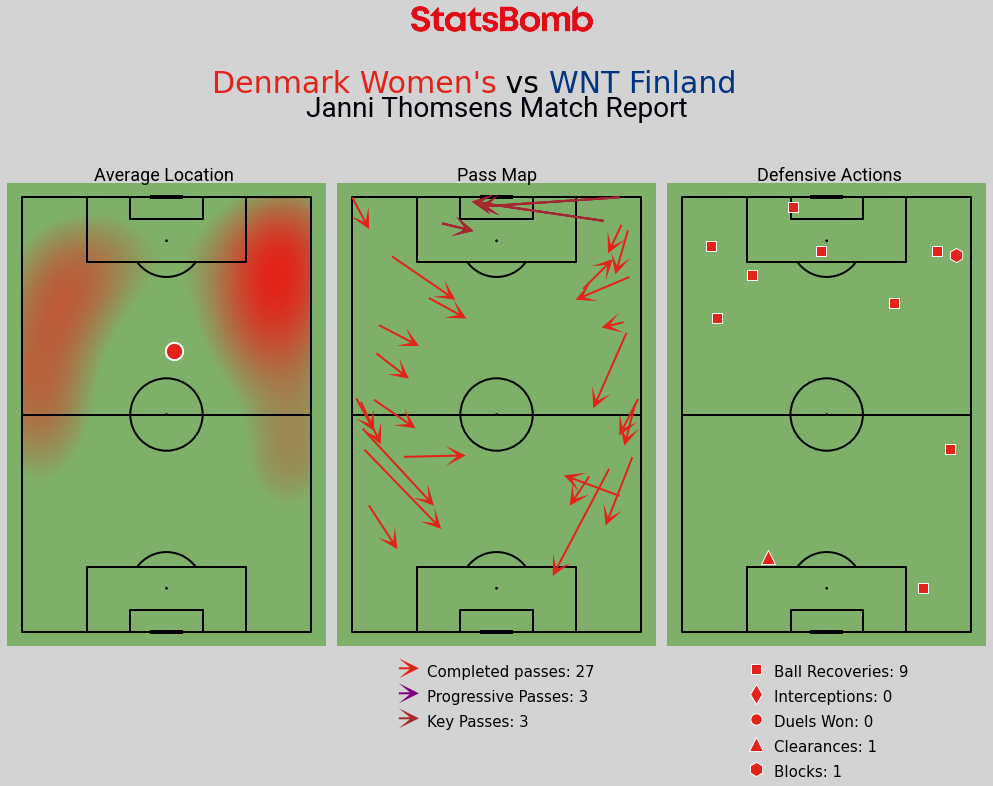

In [53]:
matchReport("Janni Thomsen")